# Проведем начальную обработку данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn

In [2]:
url = "https://raw.githubusercontent.com/SamvelNalchajyan/MachineLearning21/main/winequalityN.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(6497, 13)

In [3]:
data_raw

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data_raw['type'] = data_raw['type'].astype('category')

In [5]:
data_raw['type'].dtype

CategoricalDtype(categories=['red', 'white'], ordered=False)

In [6]:
rows_to_drop = data_raw[
    (data_raw['fixed acidity'] < data_raw['fixed acidity'].quantile(0.005)) | (data_raw['fixed acidity'] > data_raw['fixed acidity'].quantile(0.995)) | 
    (data_raw['volatile acidity'] < data_raw['volatile acidity'].quantile(0.005)) | (data_raw['volatile acidity'] > data_raw['volatile acidity'].quantile(0.995)) | 
    (data_raw['citric acid'] < data_raw['citric acid'].quantile(0.005)) | (data_raw['citric acid'] > data_raw['citric acid'].quantile(0.995)) | 
    (data_raw['residual sugar'] < data_raw['residual sugar'].quantile(0.005)) | (data_raw['residual sugar'] > data_raw['residual sugar'].quantile(0.995)) | 
    (data_raw['chlorides'] < data_raw['chlorides'].quantile(0.005)) | (data_raw['chlorides'] > data_raw['chlorides'].quantile(0.995)) | 
    (data_raw['free sulfur dioxide'] < data_raw['free sulfur dioxide'].quantile(0.005)) | (data_raw['free sulfur dioxide'] > data_raw['free sulfur dioxide'].quantile(0.995)) | 
    (data_raw['total sulfur dioxide'] < data_raw['total sulfur dioxide'].quantile(0.005)) | (data_raw['total sulfur dioxide'] > data_raw['total sulfur dioxide'].quantile(0.995)) | 
    (data_raw['density'] < data_raw['density'].quantile(0.005)) | (data_raw['density'] > data_raw['density'].quantile(0.995)) | 
    (data_raw['pH'] < data_raw['pH'].quantile(0.005)) | (data_raw['pH'] > data_raw['pH'].quantile(0.995)) | 
    (data_raw['sulphates'] < data_raw['sulphates'].quantile(0.005)) | (data_raw['sulphates'] > data_raw['sulphates'].quantile(0.995)) | 
    (data_raw['alcohol'] < data_raw['alcohol'].quantile(0.005)) | (data_raw['alcohol'] > data_raw['alcohol'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(6010, 13)

In [7]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         7
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [10]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000
mean,7.193319,0.335704,0.315594,5.418918,0.054347,30.356572,116.067304,0.994671,3.218869,0.526968,10.467870,5.822463
std,1.184304,0.155775,0.137598,4.590015,0.025694,16.554108,55.073220,0.002835,0.152715,0.132843,1.152919,0.857996
min,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.280000,8.600000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.120000,13.600000,9.000000


In [12]:
data.describe(include=['category'])

,type
count,6010
unique,2
top,white
freq,4576


In [13]:
data['type'] = pd.factorize(data['type'])[0]

In [14]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03
mean,1.405620e-14,2.516209e-14,6.241084e-15,4.287500e-14,-1.748684e-15,-1.327262e-14,-9.842007e-16,2.749511e-16,1.094962e-12,-2.776359e-14,-1.686408e-14,-4.800843e-14,-6.506581e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.597517e-01,-1.851990e+00,-1.416809e+00,-2.293590e+00,-1.006297e+00,-1.375715e+00,-1.652555e+00,-1.944090e+00,-2.134025e+00,-2.349917e+00,-1.859093e+00,-1.620122e+00,-3.289599e+00
25%,-5.597517e-01,-6.698611e-01,-6.785659e-01,-4.767066e-01,-7.884327e-01,-6.362317e-01,-8.068434e-01,-6.685156e-01,-8.079460e-01,-7.128851e-01,-7.299447e-01,-8.394948e-01,-9.585856e-01
50%,-5.597517e-01,-1.632346e-01,-2.933958e-01,-4.065465e-02,-5.269957e-01,-2.859501e-01,-8.194778e-02,5.325084e-02,8.080936e-02,-5.807241e-02,-1.277322e-01,-1.456040e-01,2.069211e-01
75%,-5.597517e-01,3.433919e-01,4.127494e-01,5.407479e-01,5.841117e-01,3.756931e-01,6.429478e-01,7.250837e-01,7.861707e-01,6.622216e-01,5.497569e-01,7.217595e-01,2.069211e-01
max,1.786209e+00,4.649717e+00,4.039768e+00,3.084384e+00,3.045977e+00,7.264566e+00,3.361306e+00,2.377429e+00,2.373234e+00,3.150510e+00,4.464138e+00,2.716696e+00,3.703441e+00


# Разобьём данные на обучающую и тестовую выборки

In [16]:
X = data_stand.drop(['quality'], axis = 1)
y = data['quality']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.167, random_state = 18)
X_train.shape, X_test.shape

((5006, 12), (1004, 12))

# Обучаем классификатор

In [18]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(
    hidden_layer_sizes = (200, 80, 20),
    solver = 'adam',
    activation = 'relu',
    max_iter=1000,
    random_state = 18,
)

In [19]:
%%time
model.fit(X_train, y_train)

Wall time: 13.2 s


MLPClassifier(hidden_layer_sizes=(200, 80, 20), max_iter=1000, random_state=18)

In [20]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.12684778266080704, 0.3705179282868526)

# Подбор гиперпараметров

In [22]:
alpha_arr = np.logspace(-3, 2, 10)
test_err = []
train_err = []

In [23]:
for alpha in alpha_arr:
    mlp_model = MLPClassifier(
                hidden_layer_sizes = (200, 80, 20),
                solver = 'adam',
                activation = 'relu',
                max_iter=1000,
                random_state = 18,
                alpha = alpha
                )
    
    mlp_model.fit(X_train, y_train)
    
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

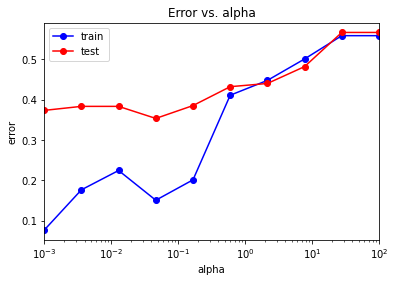

In [24]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [25]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.07670795045944866 0.35358565737051795


In [26]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.04641589]


In [27]:
alpha_opt = alpha_opt[0]

In [28]:
alpha_opt

0.046415888336127795

# Классификатор при найденном оптимальном значении alpha

In [29]:
mlp_model = MLPClassifier(
    hidden_layer_sizes = (200, 80, 20),
    solver = 'adam',
    activation = 'relu',
    random_state = 18,
    max_iter=1000,
    alpha = alpha_opt
    )
mlp_model.fit(X_train, y_train)

MLPClassifier(alpha=0.046415888336127795, hidden_layer_sizes=(200, 80, 20),
              max_iter=1000, random_state=18)

In [30]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [31]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.15081901717938473, 0.35358565737051795)

# Матрица рассогласования

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[  0   0   0   0   0   0]
 [  1   1  11   4   1   0]
 [  0  16 211  44   4   1]
 [  1  12 120 342  57  17]
 [  0   1   3  39  91   8]
 [  0   2   0   6   7   4]]


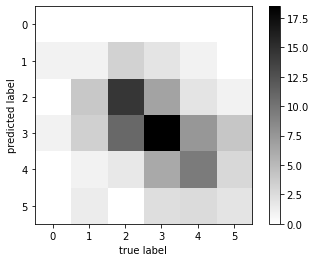

In [33]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(6))
plt.yticks(range(6))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

# Зависимость ошибки от alpha

In [34]:
neuron_count_array = np.linspace(12, 600, 12).astype(int)
test_error = []
train_error = []
for neuron_count in neuron_count_array:
    model = MLPClassifier(
        hidden_layer_sizes = (neuron_count,),
        solver = 'adam',
        activation = 'relu',
        max_iter = 1000,
        random_state = 18,
        alpha = alpha_opt
    )
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    test_error.append(np.mean(y_test != y_test_pred))
    train_error.append(np.mean(y_train != y_train_pred))

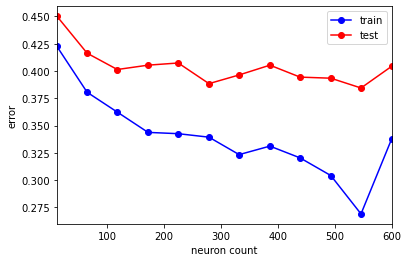

In [35]:
plt.plot(neuron_count_array, train_error, 'b-o', label='train')
plt.plot(neuron_count_array, test_error, 'r-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()
pass

In [36]:
min_test_error = np.min(test_error)
neuron_count_optimal = neuron_count_array[test_error == min_test_error][0]
print('Optimal neuron count: {}'.format(neuron_count_optimal))

Optimal neuron count: 546


# Выводы

В результате обучения полносвязной нейронной сети полусили точность распознавания качества вина примерно 65%. Наблюдается недообучение. Полученный результат немного лучше чем с kNN. При увеличении числа нейронов, ощутимого снижения ошибки не было.